# Exemplo de Regressão Linear

Uso das bibliotecas PyTorch, Pandas, NumPy e Matplotlib

Importa as biliotecas que serão usadas


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD

Gera dados fictícios para uma regressão linear

In [41]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 5 * X + np.random.randn(100, 1)

In [56]:
np.random.randn()

-0.48536354782910346

Cria um DataFrame usando Pandas

In [42]:
df = pd.DataFrame(data=np.concatenate([X, y], axis=1), columns=['X', 'y'])

Visualiza os dados usando Matplotlib

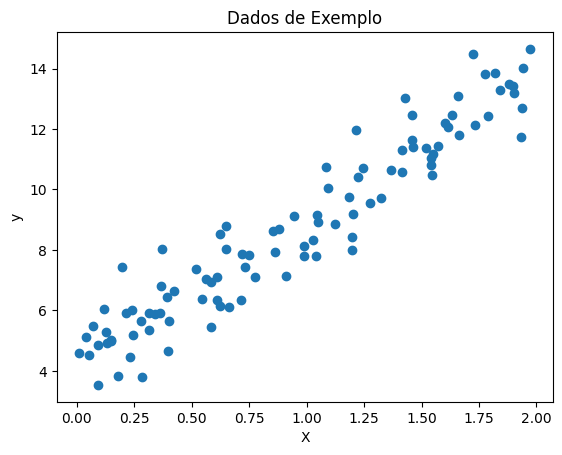

In [43]:
plt.scatter(df['X'],df['y'])
plt.title('Dados de Exemplo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Converte os dados para tensores do PyTorch

In [44]:
X_tensor = torch.tensor(df['X'].values, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

Define um modelo de regressão linear usando PyTorch

In [45]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

Define a função de perda e o otimizador usando PyTorch

In [46]:
criterion = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.01)

Treina o modelo

In [47]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Visualiza os resultados usando Matplotlib

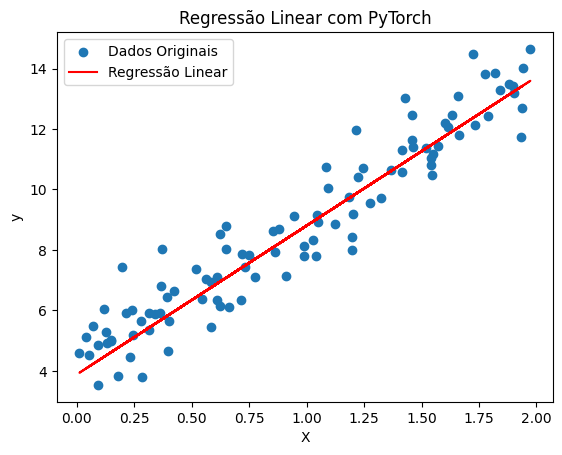

In [48]:
plt.scatter(df['X'], df['y'], label='Dados Originais')
plt.plot(df['X'], model(X_tensor).detach().numpy(), color='red', label='Regressão Linear')
plt.title('Regressão Linear com PyTorch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()